<a href="https://colab.research.google.com/github/RizkySyahry/bot-jst_uas/blob/main/UAS_JST_Model_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT WHOLE REQUIREMENTS

In [ ]:
import tensorflow as tf
import time
import numpy as np
import matplotlib.pyplot as plt
import sys
 
from datetime import datetime
from numpy import genfromtxt
from tensorflow import keras
from keras.layers import *

# TIMER

In [ ]:
import time

class TimerError(Exception):
    """A custom exception used to report errors in use of Timer class"""

class Timer:
    def __init__(self):
        self._start_time = None

    def start(self):
        """Start a new timer"""
        if self._start_time is not None:
            raise TimerError(f"Timer is running. Use .stop() to stop it")

        self._start_time = time.perf_counter()

    def stop(self):
        """Stop the timer, and report the elapsed time"""
        if self._start_time is None:
            raise TimerError(f"Timer is not running. Use .start() to start it")

        elapsed_time = time.perf_counter() - self._start_time
        self._start_time = None
        print(f"Executed time: {elapsed_time:0.4f} seconds")

# Load Data I/O

In [ ]:
A = np.array([])
B = np.array([])

df = genfromtxt('UAS_Dataset (3).csv', delimiter=',')
for i in range(len(df)):
  if(i>0):
    A = np.append(A, [ df[i][6], df[i][7], df[i][8] ]) # np.append(A, [ df[i][0], df[i][1], df[i][2], df[i][3] ])
    B = np.append(B, [ df[i][9], df[i][10], df[i][11] ]) # np.append(B, [ df[i][4], df[i][5] ])

x_train = np.reshape(A, (-1, 3, ))
y_train = np.reshape(B, (-1, 3, ))

len(x_train), len(y_train)

(5000, 5000)

In [ ]:
x_train[0].shape, x_train[0], y_train[0].shape, y_train[0]

((3,),
 array([-1.72049443,  1.34942552, -0.88849616]),
 (3,),
 array([-1.50925454,  0.        , -0.14737843]))

# DESIGN MODEL ANN ARCHITECTURE

In [ ]:
model = keras.models.Sequential([
    Dense(3, input_dim=3), # input params
    
    Dense(16, activation=tf.nn.sigmoid), # sigmoid, relu, leaky_relu, tanh
    Dense(16, activation=tf.nn.sigmoid), # sigmoid, relu, leaky_relu, tanh
    Dense(16, activation=tf.nn.sigmoid), # sigmoid, relu, leaky_relu, tanh
    Dense(16, activation=tf.nn.sigmoid), # sigmoid, relu, leaky_relu, tanh
    Dense(16, activation=tf.nn.sigmoid), # sigmoid, relu, leaky_relu, tanh
   
    Dense(3) # output params
])






# ACT AND COST FUNCTION

In [ ]:
epoch = 1000
batch_size = 16

model.compile(
    optimizer = tf.keras.optimizers.Adam(), 
    loss = tf.keras.losses.mean_squared_error,
    metrics = [ 'accuracy' ]
)

print('Processing...')
t = Timer()
t.start()

train = model.fit(
    x_train,
    y_train,
    epochs = epoch,
    verbose = 0,
    batch_size = batch_size,
    validation_split = 0.3
)

t.stop()

score = model.evaluate(x_train, y_train)

print("Num of Epoch: ", epoch)
print("AVG Training Accuracy", np.average(train.history['accuracy']))
print("AVG Training Loss", np.average(train.history['loss']))
print("eVal Accuracy", np.average(score[1]))
print("eVal Loss", np.average(score[0]))
print("Data Size: ", sys.getsizeof(df))

Processing...
Executed time: 382.5019 seconds
157/157 [==============================] - 0s 1ms/step - loss: 0.9936 - accuracy: 0.6726
Num of Epoch:  1000
AVG Training Accuracy 0.6765037145018578
AVG Training Loss 0.9995733730196953
eVal Accuracy 0.6725999712944031
eVal Loss 0.9936323165893555
Data Size:  800272


In [ ]:
def denormalize(nx, c):
    xm = 32.2718
    s = 16.08198
    if c == 'y2':
        xm = 29
        s = 8.918185
    elif c == 'y3':
          xm = 69.739
          s = 11.79956
    elif c == 'x1':
          xm = 42.773
          s = 10.33017
    elif c == 'x2':
          xm = 29.9412
          s = 8.936247
    elif c == 'x3':
          xm = 94.8964
          s = 8.887377
    return (nx*s)+xm

# TESTING T PREDICTING

In [ ]:
row = 3
pred = np.array([
        x_train[row]
])

#calculating the accuracy from its result 
abs = np.absolute(
      np.subtract(
          model.predict(pred)[0],
          y_train[row]
      )
)
loss = np.divide(abs, y_train[row])
acc = np.absolute(
      np.average(1 - loss)
)

print('Input Neuron : ', x_train[row])
print('Target: ', y_train[row])
print('Predictive: ', model.predict(pred)[0])
# print("AVG Testing Accuracy", acc)

print('denorm x1: {:0.2f}'.format(denormalize(x_train[row][0],'x1')))
print('denorm x2: {:0.2f}'.format(denormalize(x_train[row][1],'x2')))
print('denorm x3: {:0.2f}'.format(denormalize(x_train[row][2],'x3')))

print('denorm y1: {:0.2f}'.format(denormalize(model.predict(pred)[0][0],'y1')))
print('denorm y2: {:0.2f}'.format(denormalize(model.predict(pred)[0][1],'y2')))
print('denorm y3: {:0.2f}'.format(denormalize(model.predict(pred)[0][2],'y3')))



Input Neuron :  [-0.5588485  -0.32913145 -0.2133813 ]
Target:  [-0.94962193  0.11213044  0.53061318]
Predictive:  [-0.0641384   0.86000985  0.18414497]
denorm x1: 37.00
denorm x2: 27.00
denorm x3: 93.00
denorm y1: 31.24
denorm y2: 36.67
denorm y3: 71.91


# PLOTTING LOSS AND ACCURACY

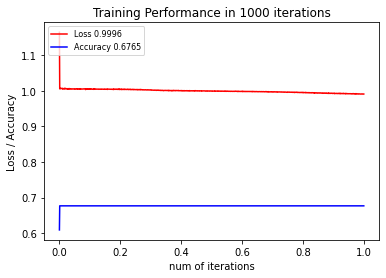

Loss / Accuracy Image Saved!!


In [ ]:
idx = len(train.history['loss'])
X_COORDS = np.linspace(0 , 1, idx)

plt.plot(X_COORDS, train.history['loss'], 'r-', label='Loss {:0.4f}'.format(np.average(train.history['loss'])))
plt.plot(X_COORDS, train.history['accuracy'], 'b-', label = 'Accuracy {:0.4f}'.format(np.average(train.history['accuracy'])))

plt.legend(loc=2, prop={'size': 8})
plt.xlabel('num of iterations')
plt.ylabel('Loss / Accuracy')
plt.title('Training Performance in %d iterations'%epoch)
# plt.tight_layout()
# plt.savefig('./img/loss_acc.png')
# plt.close
plt.show()

print("Loss / Accuracy Image Saved!!")

# PLOTTING x PREDICTION IN Z (RAD)

In [ ]:
idx = 50
X_COORDS = np.linspace(0 , 1, idx)

plot_target_y1 = np.array([])
plot_predictive_y1 = np.array([])
plot_target_y2 = np.array([])
plot_predictive_y2 = np.array([])
plot_target_y3 = np.array([])
plot_predictive_y3 = np.array([])
suggested_y3 = np.array([])
suggested_y2 = np.array([])
suggested_y1 = np.array([])

for i in range(idx):
  train = model.predict(np.array([x_train[i]]))[0]

  plot_target_y1 = np.append(plot_target_y1, y_train[i][0])
  plot_predictive_y1 = np.append(plot_predictive_y1, train[0])
  plot_target_y2 = np.append(plot_target_y2, y_train[i][1])
  plot_predictive_y2 = np.append(plot_predictive_y2, train[1])
  plot_target_y3 = np.append(plot_target_y3, y_train[i][2])
  plot_predictive_y3 = np.append(plot_predictive_y3, train[2])

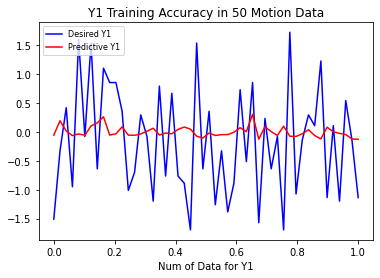

In [ ]:
plt.plot(X_COORDS, plot_target_y1, 'b-', label='Desired Y1')
plt.plot(X_COORDS, plot_predictive_y1, 'r-', label='Predictive Y1')
plt.xlabel('Num of Data for Y1')
# plt.ylabel()
plt.title('Y1 Training Accuracy in %d Motion Data'%idx)
plt.legend(loc=2, prop={'size': 8})
plt.show()

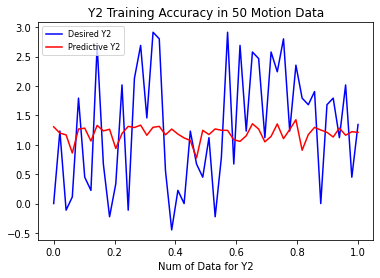

In [ ]:
plt.plot(X_COORDS, plot_target_y2, 'b-', label='Desired Y2')
plt.plot(X_COORDS, plot_predictive_y2, 'r-', label='Predictive Y2')
plt.xlabel('Num of Data for Y2')
# plt.ylabel('I (Ampere)')
plt.title('Y2 Training Accuracy in %d Motion Data'%idx)
plt.legend(loc=2, prop={'size': 8})
plt.show()

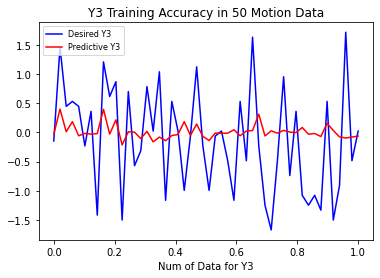

In [ ]:
plt.plot(X_COORDS, plot_target_y3, 'b-', label='Desired Y3')
plt.plot(X_COORDS, plot_predictive_y3, 'r-', label='Predictive Y3')
plt.xlabel('Num of Data for Y3')
# plt.ylabel()
plt.title('Y3 Training Accuracy in %d Motion Data'%idx)
plt.legend(loc=2, prop={'size': 8})
plt.show()

# Export Pre-Train Model

In [ ]:
 model.save('./tmp')
 from google.colab import files

 !zip -r ./dnn_sampel_model.zip ./tmp
 files.download("./dnn_sampel_model.zip")


INFO:tensorflow:Assets written to: ./tmp/assets


INFO:tensorflow:Assets written to: ./tmp/assets


  adding: tmp/ (stored 0%)
  adding: tmp/variables/ (stored 0%)
  adding: tmp/variables/variables.index (deflated 70%)
  adding: tmp/variables/variables.data-00000-of-00001 (deflated 37%)
  adding: tmp/assets/ (stored 0%)
  adding: tmp/saved_model.pb (deflated 90%)
  adding: tmp/keras_metadata.pb (deflated 83%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install tensorflowjs
import tensorflowjs
!tensorflowjs_converter --input_format=tf_hub  --skip_op_check --saved_model_tags=serve --signature_name=serving_default './tmp' './tmp/tfjs_model'

2021-07-14 08:18:45.099221: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
Loading the module using TF 2.X interface from ./tmp.
2021-07-14 08:18:47.124639: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-07-14 08:18:47.136658: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-07-14 08:18:47.136716: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (c00afdfd9e96): /proc/driver/nvidia/version does not exist
2021-07-14 08:18:47.681859: I tensorflow/core/grappler/devices.cc:69] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2021-07-14 08:18:47.682737: I tensorflow/core/grappler/clusters/single_machine.cc:357] Starting new session
2021-07-14 08:18:47.684216: I tensorflow/cor